## An international soccer match

####  There are 2 datasets of the results of male,female's international football match


#### The question is "In FIFA World Cup since 2002, Are more goals scored in women's international soccer matches than men's?"

a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
# Import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
from scipy.stats import mannwhitneyu

In [2]:
# Load data
men = pd.read_csv("men_results.csv", parse_dates=["date"], index_col=0)
women = pd.read_csv("women_results.csv", parse_dates=["date"], index_col=0)

In [3]:
# Convert tournament column to categorical
men["tournament"] = men["tournament"].astype("category")
women["tournament"] = women["tournament"].astype("category")

# Subset data
# Filter the data for the time range and tournament
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

In [4]:
# Create gender and goals_scored columns
men_subset["gender"] = "male"
women_subset["gender"] = "female"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_18532\1556731656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["gender"] = "male"
C:\Users\Admin\AppData\Local\Temp\ipykernel_18532\1556731656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["gender"] = "female"
C:\Users\Admin\AppData\Local\Temp\ipykernel_18532\1556731656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

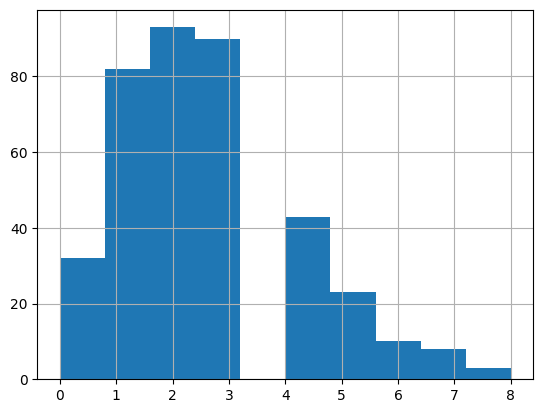

<Figure size 640x480 with 0 Axes>

In [5]:
# Determine normality using histograms
# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

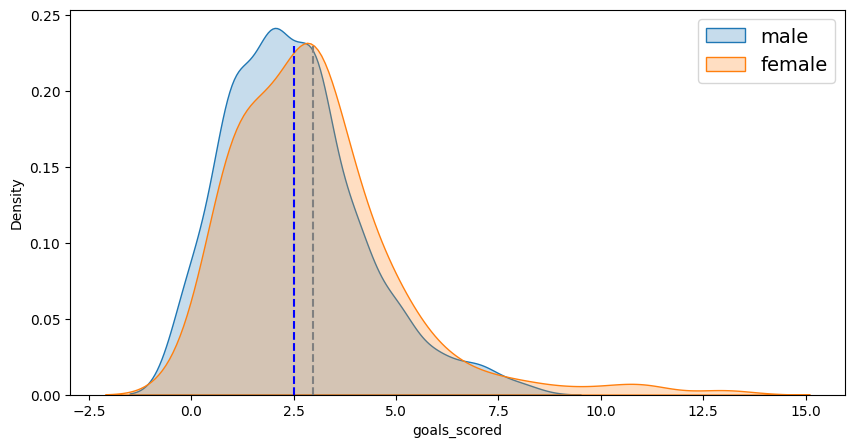

In [6]:
plt.figure(figsize=(10,5))
sns.kdeplot(men_subset["goals_scored"],fill=True)
sns.kdeplot(women_subset["goals_scored"],fill=True)
plt.legend(['male','female'],fontsize=14)
plt.vlines(x=men_subset["goals_scored"].mean(),ymin=0,ymax=0.23,color='blue',linestyle='--')
plt.vlines(x=women_subset["goals_scored"].mean(),ymin=0,ymax=0.23,color='grey',linestyle='--')
plt.show()

In [7]:
# Calculation of mean goal scores
print(f"The mean of goals scored for men is {men_subset['goals_scored'].mean()}.")
print(f"The mean of goals scored for women is {women_subset['goals_scored'].mean()}.")

The mean of goals scored for men is 2.5130208333333335.
The mean of goals scored for women is 2.98.


In [8]:
# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "gender"]]
both_subset_wide = both_subset.pivot(columns="gender", values="goals_scored")

In [9]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["female"],
                          y=both_subset_wide["male"],
                          alternative="greater")

In [10]:
# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

In [11]:
# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

result_dict = {"p_val": p_val, "result": result}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'Reject the null hypothesis'}
